#### groupBy的使用

1. groupBy可以对单个列和多个列进行统计
2. groupBy分组列默认会变成索引，可以通过参数as_index=False取消默认配置
3. 对于groupBy的结果值，其实是一组组(name,DataFrame)的元组, 因此我们可以通过get_group(name)来获取对应的DataFrame，对于多个列分组的情况，name将会是一个元组
#### agg

1. 聚合可以结合numpy库的多种函数来使用


In [ ]:
import pandas as pd
import numpy as np
# TODO
%matplotlib inline

In [45]:
df=pd.DataFrame({
    "A":["a","aa","aa","aa","aaaaa"],
    "B":["b","bb", "bb", "bbbb","bbbbb"],
    "C": np.random.randn(5),
    "D": np.random.randn(5)
})

In [11]:
df

,A,B,C,D
0,a,b,0.404962,0.949007
1,aa,bb,0.098587,-0.420942
2,aa,bb,0.794986,2.097131
3,aa,bbbb,1.171146,-0.332080
4,aaaaa,bbbbb,1.210573,0.610010


In [12]:
# 单个groupBy 分组
df.groupby(["A"]).sum()

,B,C,D
A,,,
a,b,0.404962,0.949007
aa,bbbbbbbb,2.064718,1.344110
aaaaa,bbbbb,1.210573,0.610010


In [13]:
# 多列的分组
df.groupby(["A","B"]).mean()

C         D
A     B                        
a     b      0.404962  0.949007
aa    bb     0.446786  0.838095
      bbbb   1.171146 -0.332080
aaaaa bbbbb  1.210573  0.610010

In [14]:
# 此时A、B变成了索引
df.groupby(["A","B"], as_index=False).mean()

,A,B,C,D
0,a,b,0.404962,0.949007
1,aa,bb,0.446786,0.838095
2,aa,bbbb,1.171146,-0.332080
3,aaaaa,bbbbb,1.210573,0.610010


In [18]:
# 对于group 可以对其进行多个聚合函数
df.groupby(["A","B"]).agg([np.sum, np.mean])

C                   D          
                  sum      mean       sum      mean
A     B                                            
a     b      0.404962  0.404962  0.949007  0.949007
aa    bb     0.893572  0.446786  1.676189  0.838095
      bbbb   1.171146  1.171146 -0.332080 -0.332080
aaaaa bbbbb  1.210573  1.210573  0.610010  0.610010

In [39]:
# 此处如果重命名的话, 只能修改其column的名称
df.groupby(["A","B"]).agg({"C": np.sum, "D": np.mean})

C         D
A     B                        
a     b      0.404962  0.949007
aa    bb     0.893572  0.838095
      bbbb   1.171146 -0.332080
aaaaa bbbbb  1.210573  0.610010

In [47]:
group=df.groupby("A")
for name,d in group:
    print("name:",name)
    print(d)

name: a
   A  B         C         D
0  a  b -0.637994 -0.896174
name: aa
    A     B         C         D
1  aa    bb  0.980236  1.290300
2  aa    bb -0.285424  0.071083
3  aa  bbbb -1.640489 -0.275743
name: aaaaa
       A      B         C         D
4  aaaaa  bbbbb -0.594658 -0.642336


In [48]:
group.get_group("a")

,A,B,C,D
0,a,b,-0.637994,-0.896174


In [49]:
group.get_group("aa")

,A,B,C,D
1,aa,bb,0.980236,1.290300
2,aa,bb,-0.285424,0.071083
3,aa,bbbb,-1.640489,-0.275743


In [50]:
# 对多个列的分组
group2=df.groupby(["A","B"])
for name2,g2 in group2:
    print(name2)
    print(g2)

('a', 'b')
   A  B         C         D
0  a  b -0.637994 -0.896174
('aa', 'bb')
    A   B         C         D
1  aa  bb  0.980236  1.290300
2  aa  bb -0.285424  0.071083
('aa', 'bbbb')
    A     B         C         D
3  aa  bbbb -1.640489 -0.275743
('aaaaa', 'bbbbb')
       A      B         C         D
4  aaaaa  bbbbb -0.594658 -0.642336


In [51]:
# 查看某个分组的信息
group2.get_group(('a', 'b'))

,A,B,C,D
0,a,b,-0.637994,-0.896174


#### 图标数据

In [52]:
df=pd.read_csv('./data/beijing_weather.csv')

In [94]:
# df[["maxTemp","minTemp"]]=df["温度"].str.replace("[C℃]","", regex=True).str.split("～")
df[["maxTemp","minTemp"]]=df["温度"].str.replace("[C℃]","", regex=True).str.split("～",expand=True)
df["maxTemp"]=df["maxTemp"].astype('int32')
df["minTemp"]=df["minTemp"].astype('int32')

In [98]:
df.head()

,城市,时间,天气,温度,风向,maxTemp,minTemp,月份
0,北京,2018/6/30,雷阵雨转多云,37℃～23℃,西南风转东南风 <3级,37,23,2018-6
1,北京,2018/6/29,多云,39℃～25℃,西南风转南风 3-4级转3-4级,39,25,2018-6
2,北京,2018/6/28,晴,35℃～24℃,北风转西南风 3-4级转3-4级,35,24,2018-6
3,北京,2018/6/27,多云转晴,38℃～25℃,西北风转微风 3-4级转3-4级,38,25,2018-6
4,北京,2018/6/26,晴,36℃～25℃,西南风转南风 3-4级转3-4级,36,25,2018-6


In [99]:
def get_month(df):
    r = df["时间"].split("/")
    return f"{r[0]}-{r[1]}"
df["月份"] = df.apply(get_month, axis=1)

In [100]:
data=df.groupby("maxTemp")["minTemp"].max()

In [101]:
data.head(3)

maxTemp
22    18
25    17
26    19
Name: minTemp, dtype: int32

<Axes: xlabel='maxTemp'>

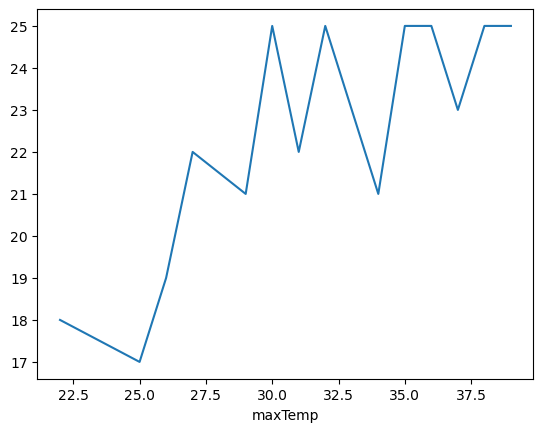

In [102]:
data.plot()